## Import Libraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import m2cgen
import os
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)  # Show full content in each cell
pd.set_option('display.width', 1000)  # Set max width

## Load Data

In [11]:
dataset_path = os.getcwd().replace('/notebook' , '') + "/dataset/"

# Read training data
train_df = pd.read_csv(dataset_path + "train.csv")
x = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]
scaler = MinMaxScaler() # Load Scaler module
x_scaled = scaler.fit_transform(x)
x_train , x_val , y_train , y_val = train_test_split(x_scaled ,y ,test_size= 0.2, stratify = y)

# Read testing data
test_df = pd.read_csv(dataset_path + "test.csv")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
x_test_scaled = scaler.transform(x_test)

# Encode target labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.fit_transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

## Modeling

### Random Forest

In [ ]:
rf = RandomForestClassifier()

param_dist = {
    'n_estimators' : [1 , 2 , 3 , 5 , 7 , 10],
    'max_depth' : [1 , 2 , 3  , 5 , 7]
    }

random_search = RandomizedSearchCV(estimator = rf,
                                    param_distributions = param_dist,
                                    cv = 5,
                                    random_state=42,
                                    n_jobs=-1
                                    )
random_search.fit(x_train, y_train)

cv_results = pd.DataFrame(random_search.cv_results_)
cv_results = cv_results[["mean_test_score", "params"]].sort_values(by="mean_test_score", ascending=False)

cv_results 

,mean_test_score,params
6,0.948817,"{'n_estimators': 7, 'max_depth': 7}"
0,0.938955,"{'n_estimators': 5, 'max_depth': 7}"
2,0.922803,"{'n_estimators': 10, 'max_depth': 5}"
7,0.873659,"{'n_estimators': 1, 'max_depth': 7}"
1,0.869581,"{'n_estimators': 5, 'max_depth': 3}"
3,0.861422,"{'n_estimators': 10, 'max_depth': 3}"
5,0.750394,"{'n_estimators': 5, 'max_depth': 2}"
8,0.737637,"{'n_estimators': 1, 'max_depth': 3}"
4,0.641373,"{'n_estimators': 3, 'max_depth': 2}"
9,0.360484,"{'n_estimators': 1, 'max_depth': 1}"


In [47]:
rf = RandomForestClassifier(n_estimators = 5 , max_depth = 3)
rf.fit(x_train , y_train)
rf.score(x_val , y_val)
rf_report = classification_report(rf.predict(x_val) , y_val)
print(rf_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.87      0.87      0.87       255
          STANDING       0.88      0.88      0.88       277
           WALKING       0.95      0.73      0.83       316
WALKING_DOWNSTAIRS       0.86      0.86      0.86       198
  WALKING_UPSTAIRS       0.59      0.88      0.70       143

          accuracy                           0.87      1471
         macro avg       0.86      0.87      0.86      1471
      weighted avg       0.89      0.87      0.87      1471



In [48]:
rf_train_report = classification_report(rf.predict(x_train) , y_train)
print(rf_train_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1123
           SITTING       0.85      0.88      0.86       988
          STANDING       0.89      0.86      0.88      1139
           WALKING       0.95      0.74      0.83      1251
WALKING_DOWNSTAIRS       0.82      0.90      0.86       723
  WALKING_UPSTAIRS       0.66      0.87      0.75       657

          accuracy                           0.87      5881
         macro avg       0.86      0.88      0.86      5881
      weighted avg       0.88      0.87      0.87      5881



In [49]:
rf_test_report = classification_report(rf.predict(x_test_scaled) , y_test)
print(rf_test_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       536
           SITTING       0.82      0.88      0.85       459
          STANDING       0.89      0.84      0.87       564
           WALKING       0.93      0.67      0.78       688
WALKING_DOWNSTAIRS       0.67      0.93      0.78       303
  WALKING_UPSTAIRS       0.65      0.77      0.71       397

          accuracy                           0.84      2947
         macro avg       0.83      0.85      0.83      2947
      weighted avg       0.85      0.84      0.84      2947



In [50]:
with open(os.getcwd().replace('/notebook' , '') + "/model/rf_model.py" , "w") as f:
  f.write(m2cgen.export_to_python(rf))
print(os.path.getsize(os.getcwd().replace('/notebook' , '') + "/model/rf_model.py" ))

5016


### Decison Tree

In [58]:
dt = DecisionTreeClassifier()

param_dist = {
    'max_depth' : [1 , 2 , 3  , 5 , 7 , 10 , 15 , 20],
    'criterion' : ['gini' , 'entropy']
    }

random_search = RandomizedSearchCV(estimator = dt,
                                    param_distributions = param_dist,
                                    cv = 5,
                                    random_state=42,
                                    n_jobs=-1
                                    )
random_search.fit(x_train, y_train)

cv_results = pd.DataFrame(random_search.cv_results_)
cv_results = cv_results[["mean_test_score", "params"]].sort_values(by="mean_test_score", ascending=False)

cv_results 

,mean_test_score,params
2,0.938616,"{'max_depth': 10, 'criterion': 'gini'}"
3,0.937765,"{'max_depth': 15, 'criterion': 'entropy'}"
9,0.936405,"{'max_depth': 20, 'criterion': 'entropy'}"
4,0.936234,"{'max_depth': 10, 'criterion': 'entropy'}"
5,0.911577,"{'max_depth': 5, 'criterion': 'entropy'}"
8,0.786091,"{'max_depth': 3, 'criterion': 'gini'}"
7,0.652610,"{'max_depth': 2, 'criterion': 'entropy'}"
1,0.544465,"{'max_depth': 2, 'criterion': 'gini'}"
0,0.377827,"{'max_depth': 1, 'criterion': 'gini'}"
6,0.357762,"{'max_depth': 1, 'criterion': 'entropy'}"


In [59]:
dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 10)
dt.fit(x_train , y_train)
dt.score(x_val , y_val)
dt_report = classification_report(dt.predict(x_val) , y_val)
print(dt_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.93      0.95      0.94       253
          STANDING       0.95      0.94      0.95       279
           WALKING       0.94      0.91      0.92       253
WALKING_DOWNSTAIRS       0.92      0.95      0.93       191
  WALKING_UPSTAIRS       0.92      0.92      0.92       213

          accuracy                           0.95      1471
         macro avg       0.94      0.94      0.94      1471
      weighted avg       0.95      0.95      0.95      1471



In [60]:
dt_train_report = classification_report(dt.predict(x_train) , y_train)
print(dt_train_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1125
           SITTING       0.99      0.99      0.99      1025
          STANDING       0.99      0.99      0.99      1103
           WALKING       0.99      0.99      0.99       983
WALKING_DOWNSTAIRS       0.99      0.99      0.99       787
  WALKING_UPSTAIRS       0.99      0.99      0.99       858

          accuracy                           0.99      5881
         macro avg       0.99      0.99      0.99      5881
      weighted avg       0.99      0.99      0.99      5881



In [61]:
dt_test_report = classification_report(dt.predict(x_test_scaled) , y_test)
print(dt_test_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.79      0.83      0.81       469
          STANDING       0.85      0.82      0.83       554
           WALKING       0.93      0.81      0.86       568
WALKING_DOWNSTAIRS       0.77      0.86      0.81       376
  WALKING_UPSTAIRS       0.76      0.81      0.78       443

          accuracy                           0.85      2947
         macro avg       0.85      0.85      0.85      2947
      weighted avg       0.86      0.85      0.85      2947



In [62]:
with open(os.getcwd().replace('/notebook' , '') + "/model/dt_model.py" , "w") as f:
  f.write(m2cgen.export_to_python(dt))
print(os.path.getsize(os.getcwd().replace('/notebook' , '') + "/model/dt_model.py" ))

19063


### XGBOOST

In [10]:
xgb = XGBClassifier()

param_dist = {
    'n_estimators' : [1 , 2 , 3 , 5 , 7 , 10],
    'max_depth' : [1 , 2 , 3  , 5 , 7],
    "learning_rate": [0.01, 0.3, 1]
    }

random_search = RandomizedSearchCV(estimator = xgb,
                                    param_distributions = param_dist,
                                    cv = 5,
                                    random_state=42,
                                    n_jobs=-1
                                    )
random_search.fit(x_train, y_train_encoded)

cv_results = pd.DataFrame(random_search.cv_results_)
cv_results = cv_results[["mean_test_score", "params"]].sort_values(by="mean_test_score", ascending=False)

cv_results 

/opt/anaconda3/envs/pranit/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,mean_test_score,params
3,0.962082,"{'n_estimators': 7, 'max_depth': 2, 'learning_rate': 1}"
2,0.961742,"{'n_estimators': 2, 'max_depth': 7, 'learning_rate': 0.3}"
7,0.948989,"{'n_estimators': 10, 'max_depth': 1, 'learning_rate': 1}"
5,0.945589,"{'n_estimators': 3, 'max_depth': 7, 'learning_rate': 0.01}"
1,0.940486,"{'n_estimators': 7, 'max_depth': 5, 'learning_rate': 0.01}"
0,0.938445,"{'n_estimators': 7, 'max_depth': 2, 'learning_rate': 0.3}"
9,0.935725,"{'n_estimators': 3, 'max_depth': 3, 'learning_rate': 0.3}"
6,0.929433,"{'n_estimators': 5, 'max_depth': 2, 'learning_rate': 0.3}"
8,0.876213,"{'n_estimators': 7, 'max_depth': 2, 'learning_rate': 0.01}"
4,0.745450,"{'n_estimators': 1, 'max_depth': 1, 'learning_rate': 0.01}"


In [25]:
xgb = XGBClassifier(n_estimators = 7 , max_depth = 2 , learning_rate = 1 , num_parallel_tree = 1)
xgb.fit(x_train , y_train_encoded)
xgb.score(x_val , y_val_encoded)
xgb_report = classification_report(label_encoder.inverse_transform(xgb.predict(x_val)) , label_encoder.inverse_transform(y_val_encoded))
print(xgb_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.93      0.95      0.94       251
          STANDING       0.95      0.94      0.95       279
           WALKING       0.99      0.99      0.99       246
WALKING_DOWNSTAIRS       0.97      0.99      0.98       192
  WALKING_UPSTAIRS       0.99      0.96      0.98       221

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471



In [26]:
xgb_train_report = classification_report(label_encoder.inverse_transform(xgb.predict(x_train)) , label_encoder.inverse_transform(y_train_encoded))
print(xgb_train_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1125
           SITTING       0.94      0.95      0.95      1019
          STANDING       0.96      0.95      0.95      1110
           WALKING       0.99      0.99      0.99       977
WALKING_DOWNSTAIRS       0.99      0.99      0.99       788
  WALKING_UPSTAIRS       0.99      0.99      0.99       862

          accuracy                           0.98      5881
         macro avg       0.98      0.98      0.98      5881
      weighted avg       0.98      0.98      0.98      5881



In [27]:
xgb_test_report = classification_report(label_encoder.inverse_transform(xgb.predict(x_test_scaled)) , label_encoder.inverse_transform(y_test_encoded))
print(xgb_test_report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.85      0.88      0.86       474
          STANDING       0.89      0.87      0.88       545
           WALKING       0.97      0.89      0.93       540
WALKING_DOWNSTAIRS       0.86      0.95      0.90       378
  WALKING_UPSTAIRS       0.91      0.90      0.90       473

          accuracy                           0.91      2947
         macro avg       0.91      0.92      0.91      2947
      weighted avg       0.92      0.91      0.91      2947



In [28]:
with open(os.getcwd().replace('/notebook' , '') + "/model/xgb_model.py" , "w") as f:
  f.write(m2cgen.export_to_python(xgb))
print(os.path.getsize(os.getcwd().replace('/notebook' , '') + "/model/xgb_model.py" ))

11050


### Model Accuracy Comparision

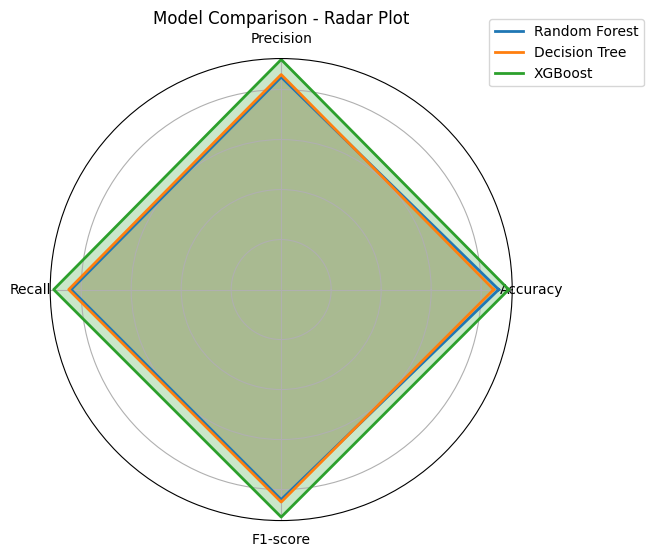

In [28]:
# Define models and values
models = {
    "Random Forest": [0.87, 0.85, 0.84, 0.84],
    "Decision Tree": [0.85, 0.86, 0.85, 0.85],
    "XGBoost": [0.91, 0.92, 0.91, 0.91]
}
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

# Convert to radians
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each model
for model, values in models.items():
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=model, linewidth=2)
    ax.fill(angles, values, alpha=0.25)  # Fill area

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.title("Model Comparison - Radar Plot")
plt.show()